In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import minimize 
import csv
from scipy import stats
import math

In [31]:
df = pd.read_csv("sushan_intraday_data.csv")
daily_data = pd.read_csv('sushan_daily.csv', parse_dates=['DATE'])
df['str_date'] = df['date']
df['datetime'] = df['date'] + ' ' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])
df['symbol'] = df['sym_root'] + df['sym_suffix']
df.loc[df['sym_suffix'].isnull(), 'symbol'] = df['sym_root']
data = df.merge(daily_data[['DATE', 'symbol', 'total_vol']], how='left', left_on=['date', 'symbol'], right_on = ['DATE', 'symbol'])
data.index = pd.DatetimeIndex(df['datetime'])
data = data.drop(['DATE','datetime'],axis=1)
data = data.between_time('09:30:00', '16:00:00')
data['perc_vol'] = data['size']/data['total_vol']
QCOM = data.loc[data.symbol == 'QCOM'].copy()
QCOM.resample('60s').asfreq()
QCOM = QCOM.between_time('09:30:00', '16:00:00')
col = ['sym_root', 'sym_suffix', 'str_date']
QCOM = QCOM.drop(col, axis=1)

In [32]:
QCOM.to_csv('QCOM_data.csv')

In [33]:
QCOM[QCOM['date'] == '2019-01-02']

,date,time,size,symbol,total_vol,perc_vol
datetime,,,,,,
2019-01-02 09:30:00,2019-01-02,09:30:00,272528.0,QCOM,8774062.0,0.031061
2019-01-02 09:31:00,2019-01-02,09:31:00,86785.0,QCOM,8774062.0,0.009891
2019-01-02 09:32:00,2019-01-02,09:32:00,119364.0,QCOM,8774062.0,0.013604
2019-01-02 09:33:00,2019-01-02,09:33:00,50269.0,QCOM,8774062.0,0.005729
2019-01-02 09:34:00,2019-01-02,09:34:00,87034.0,QCOM,8774062.0,0.009919
...,...,...,...,...,...,...
2019-01-02 15:56:00,2019-01-02,15:56:00,113182.0,QCOM,8774062.0,0.012900
2019-01-02 15:57:00,2019-01-02,15:57:00,52714.0,QCOM,8774062.0,0.006008
2019-01-02 15:58:00,2019-01-02,15:58:00,98869.0,QCOM,8774062.0,0.011268


In [19]:
col = ['sym_root', 'sym_suffix']
COST = COST.drop(col, axis=1)

In [4]:
selection = COST[COST['size']==0]
selection

,date,time,size,str_date,symbol,total_vol,perc_vol
datetime,,,,,,,
2019-12-24 13:15:00,2019-12-24,13:15:00,0.0,2019-12-24,COST,543183.0,0.0


In [5]:
#test for only 1 day for practice, 2020-04-17
COST['log_20mins_AM'] = None
COST['log_size'] = np.log(COST['size'])
COST['log_total_vol'] = np.log(COST['total_vol'])
COST['log_20mins_AM'] = COST.groupby('date')['log_size'].\
                            transform(lambda x:x.shift().rolling(20).mean())
COST['y_true'] = None
COST['y_true'] = COST['log_size'] - COST['log_20mins_AM']
COST

/Users/zss/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,time,size,str_date,symbol,total_vol,perc_vol,log_20mins_AM,log_size,log_total_vol,y_true
datetime,,,,,,,,,,,
2019-01-02 09:30:00,2019-01-02,09:30:00,56436.0,2019-01-02,COST,1798591.0,0.031378,NaN,10.940863,14.402514,NaN
2019-01-02 09:31:00,2019-01-02,09:31:00,4285.0,2019-01-02,COST,1798591.0,0.002382,NaN,8.362876,14.402514,NaN
2019-01-02 09:32:00,2019-01-02,09:32:00,3382.0,2019-01-02,COST,1798591.0,0.001880,NaN,8.126223,14.402514,NaN
2019-01-02 09:33:00,2019-01-02,09:33:00,8830.0,2019-01-02,COST,1798591.0,0.004909,NaN,9.085910,14.402514,NaN
2019-01-02 09:34:00,2019-01-02,09:34:00,7228.0,2019-01-02,COST,1798591.0,0.004019,NaN,8.885718,14.402514,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 15:56:00,2021-12-31,15:56:00,19307.0,2021-12-31,COST,1071221.0,0.018023,8.667869,9.868223,13.884310,1.200354
2021-12-31 15:57:00,2021-12-31,15:57:00,20657.0,2021-12-31,COST,1071221.0,0.019284,8.769958,9.935810,13.884310,1.165852
2021-12-31 15:58:00,2021-12-31,15:58:00,28415.0,2021-12-31,COST,1071221.0,0.026526,8.882074,10.254672,13.884310,1.372598


In [6]:
april = COST.loc[COST['date'] <= '2020-04-17']
april

,date,time,size,str_date,symbol,total_vol,perc_vol,log_20mins_AM,log_size,log_total_vol,y_true
datetime,,,,,,,,,,,
2019-01-02 09:30:00,2019-01-02,09:30:00,56436.0,2019-01-02,COST,1798591.0,0.031378,NaN,10.940863,14.402514,NaN
2019-01-02 09:31:00,2019-01-02,09:31:00,4285.0,2019-01-02,COST,1798591.0,0.002382,NaN,8.362876,14.402514,NaN
2019-01-02 09:32:00,2019-01-02,09:32:00,3382.0,2019-01-02,COST,1798591.0,0.001880,NaN,8.126223,14.402514,NaN
2019-01-02 09:33:00,2019-01-02,09:33:00,8830.0,2019-01-02,COST,1798591.0,0.004909,NaN,9.085910,14.402514,NaN
2019-01-02 09:34:00,2019-01-02,09:34:00,7228.0,2019-01-02,COST,1798591.0,0.004019,NaN,8.885718,14.402514,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17 15:56:00,2020-04-17,15:56:00,29396.0,2020-04-17,COST,3188335.0,0.009220,9.640625,10.288614,14.975009,0.647989
2020-04-17 15:57:00,2020-04-17,15:57:00,41627.0,2020-04-17,COST,3188335.0,0.013056,9.713852,10.636504,14.975009,0.922653
2020-04-17 15:58:00,2020-04-17,15:58:00,45691.0,2020-04-17,COST,3188335.0,0.014331,9.792111,10.729657,14.975009,0.937545


In [7]:
#try to smooth the curve by abstracting the log_size per minute mean, 
# because of the opening and closing volatilities
past_df = april.groupby('date')['log_size'].mean()
past_df

date
2019-01-02    8.104931
2019-01-03    8.442631
2019-01-04    8.415820
2019-01-07    8.142811
2019-01-08    8.283753
                ...   
2020-04-13    8.455141
2020-04-14    8.951209
2020-04-15    8.566157
2020-04-16    8.827777
2020-04-17    8.741272
Name: log_size, Length: 326, dtype: float64

In [8]:
#too big ?
past_day_mean  = past_df.mean()
past_day_mean

8.01309774074346

In [9]:
april = april.dropna()

In [10]:
def estimate_y(y_true, phi, theta):
    '''
    Calculate y_hat based on known y_true

    Input:
        y_true (array): log(Vt) - 20-day moving average
        phi(float): universal standard is about 0.7
        theta(float): universal standard is about -0.3

    Outputs: 
        y_hat (array):estimated y_true 
    '''
    n = len(y_true)
    y_hat = np.zeros(n)
    eps = np.zeros(n)
    for t in range(1,n):
        y_hat[t] = phi*y_true[t-1] + theta * eps[t-1]
        eps[t] = y_true[t] - y_hat[t]
    return y_hat

def my_objective(param, y_true):
    '''
    Objective loss function for minimizing
    Find the Weighted Asymmetrical Logarithmic Error

    Input:
        param(float array): potential phi and theta
        y_true (array): log(Vt) - 20-day moving average
        
    Outputs: 
        ALE, weighted asymmetrical logarithmic error
    '''
    phi = param[0]
    theta = param[1]
    y_hat = estimate_y(y_true, phi, theta)
    y_diff = y_hat - y_true
    ALE = np.sum((1.5 + 0.5*np.sign(y_diff)) * np.abs(y_diff))
    return ALE 


In [11]:
train = april[april['date'] <= '2019-11-22']
test = april[april['date'] > '2019-11-22']

In [12]:
daily_train = train.groupby('date', as_index=False)['y_true'].apply(np.array)
daily_train

0      [0.06301615967108454, -0.15106976430483954, -0...
1      [-0.22475526929941125, -0.9723587695367835, -0...
2      [0.07817919299487386, -0.33449499924907045, 0....
3      [-1.6186091622683136, -0.8629431455653194, -0....
4      [0.1551150483756274, 0.4565890867542084, -0.02...
                             ...                        
222    [-0.0900686056865645, 0.6642924764315588, -1.6...
223    [-1.2384087509227593, -0.09899540807210627, -0...
224    [0.021191671943771695, -0.2852001854598818, 0....
225    [0.3049890802695572, -0.5246421768564655, -0.2...
226    [0.2773958986836451, -0.4318835678419015, -0.4...
Name: y_true, Length: 227, dtype: object

In [13]:
phi_lst = []
theta_lst = []
for i in range(len(daily_train)):
    res = minimize(my_objective, np.array([0.5,0.5]), args=daily_train[i])
    phi_lst.append(res.x[0])
    theta_lst.append(res.x[1])

/var/folders/f2/41ckpyln3370bz1wf7vdknb80000gn/T/ipykernel_50675/3717663004.py:17: RuntimeWarning: overflow encountered in double_scalars
  y_hat[t] = phi*y_true[t-1] + theta * eps[t-1]
/Users/zss/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/f2/41ckpyln3370bz1wf7vdknb80000gn/T/ipykernel_50675/3717663004.py:17: RuntimeWarning: overflow encountered in double_scalars
  y_hat[t] = phi*y_true[t-1] + theta * eps[t-1]
/var/folders/f2/41ckpyln3370bz1wf7vdknb80000gn/T/ipykernel_50675/3717663004.py:17: RuntimeWarning: overflow encountered in double_scalars
  y_hat[t] = phi*y_true[t-1] + theta * eps[t-1]
/Users/zss/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/f2/41ckpyln3370bz1wf7vdknb80000gn/T/ipykernel_50675/3717663004.py:17: RuntimeWarning: overflow encountered in dou

In [14]:
from statistics import mean
ave_phi = mean(phi_lst)
ave_theta = mean(theta_lst)
ave_phi,ave_theta

(0.8153674562648457, -0.7379235932950405)

In [15]:
plot_check = test[test['date'] == '2019-11-25']
y_true_test= plot_check['y_true'].values
plot_check.loc[:,'y_hat'] = estimate_y(y_true_test, 0.8153674562648457, -0.7379235932950405)
plot_check['log_size_hat'] = plot_check['y_hat'] + plot_check['log_20mins_AM']
plot_check

/Users/zss/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/var/folders/f2/41ckpyln3370bz1wf7vdknb80000gn/T/ipykernel_50675/1874770069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_check['log_size_hat'] = plot_check['y_hat'] + plot_check['log_20mins_AM']


,date,time,size,str_date,symbol,total_vol,perc_vol,log_20mins_AM,log_size,log_total_vol,y_true,y_hat,log_size_hat
datetime,,,,,,,,,,,,,
2019-11-25 09:50:00,2019-11-25,09:50:00,6340.0,2019-11-25,COST,1175613.0,0.005393,8.291294,8.754634,13.9773,0.463340,0.000000,8.291294
2019-11-25 09:51:00,2019-11-25,09:51:00,2987.0,2019-11-25,COST,1175613.0,0.002541,8.189760,8.002025,13.9773,-0.187735,0.377793,8.567552
2019-11-25 09:52:00,2019-11-25,09:52:00,2881.0,2019-11-25,COST,1175613.0,0.002451,8.166915,7.965893,13.9773,-0.201022,0.264243,8.431158
2019-11-25 09:53:00,2019-11-25,09:53:00,1553.0,2019-11-25,COST,1175613.0,0.001321,8.149077,7.347944,13.9773,-0.801134,0.179423,8.328501
2019-11-25 09:54:00,2019-11-25,09:54:00,4377.0,2019-11-25,COST,1175613.0,0.003723,8.111074,8.384119,13.9773,0.273045,0.070358,8.181431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25 15:56:00,2019-11-25,15:56:00,12718.0,2019-11-25,COST,1175613.0,0.010818,8.450705,9.450774,13.9773,1.000069,0.248899,8.699604
2019-11-25 15:57:00,2019-11-25,15:57:00,8927.0,2019-11-25,COST,1175613.0,0.007593,8.543323,9.096836,13.9773,0.553512,0.261118,8.804441
2019-11-25 15:58:00,2019-11-25,15:58:00,11970.0,2019-11-25,COST,1175613.0,0.010182,8.581658,9.390159,13.9773,0.808501,0.235551,8.817209


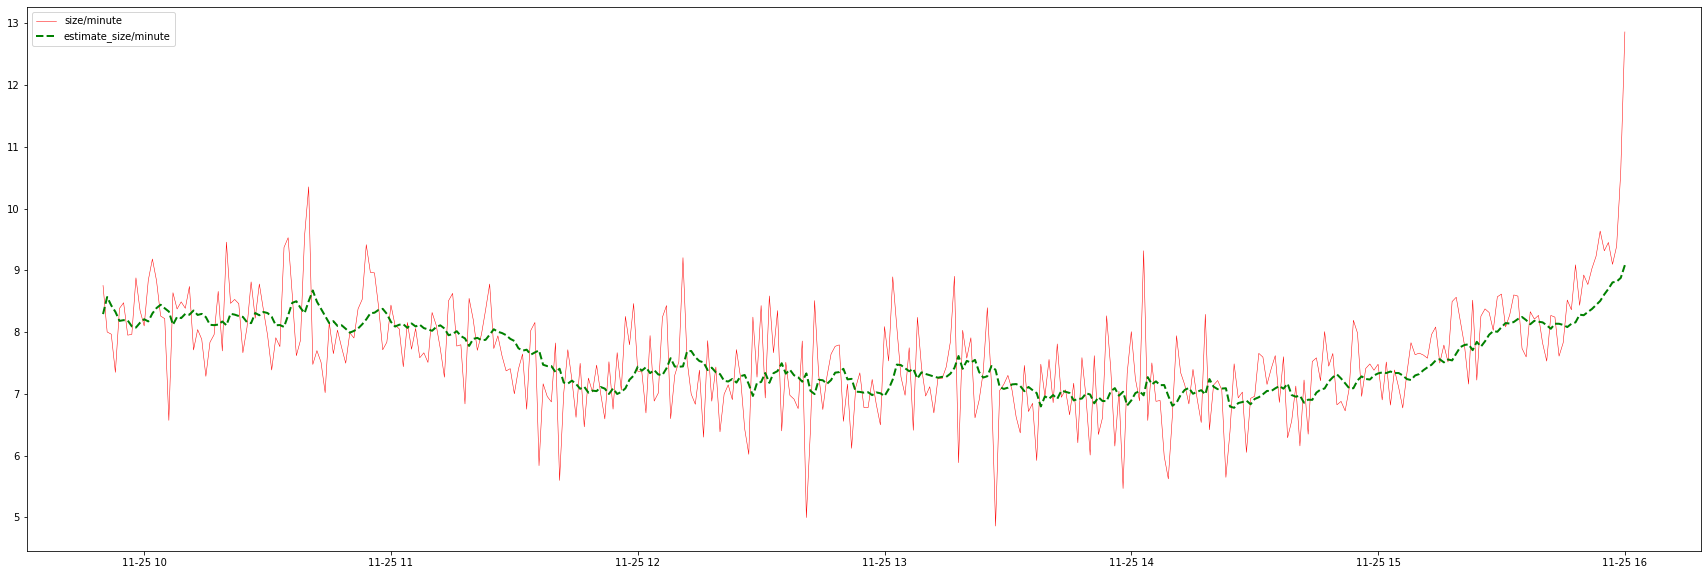

In [16]:
plt.figure(figsize=(30,10))
plt.plot(plot_check.index, plot_check['log_size'].values, color='r', linewidth = 0.5)
plt.plot(plot_check.index, plot_check['log_size_hat'].values, color = 'g', linestyle = 'dashed', linewidth = 2)
plt.legend(['size/minute', 'estimate_size/minute'])
plt.show()